## Introduction

One way to measure a student’s math ability is their final class grade. Different factors can influence this final grade such as study habits, previous knowledge, and time studying. We are going to study how internet access at home may be associated with final grades.
Our question is the following: Do students with internet access at home have higher mean final math grades than students without internet access at home? 

There are a few reasons why we chose this topic. For one, we want our topic to involve students as it makes this project more interesting and personal. The topic is also relevant due to the prevalence of wifi-requiring tools used in education. Another reason is that there are a decent number of students in both of our chosen categories. If there was only a couple of students in the “no internet access” category, we may be less confident in the preciseness of our results. 

Our location parameter is the mean and our scale parameter is the standard deviation. Since our response variable is the final grade out of 20, we can study with mean and standard deviation without being concerned about influential outliers.


## Description of the Data Set

The Student Performance Data Set was created by Paulo Cortez and Alice Silva, two researchers from the University of Minho, in 2008. They obtained the performance of secondary students from 2 Portuguese schools in the subjects Mathematics and Portuguese and created 2 separate data sets. For this project, we will only be using the Mathematics data set. The authors modelled the data based on the binary/five-level classification and regression tasks. It was collected by using school reports and questionnaires to create a data set that consists of 33 columns: 30 input attributes and 3 target attributes (G1, G2, G3) and 395 rows that corresponded to the number of students that participated in the study. 

We will be focusing on the internet column as our input attribute and the G3 attribute as our target attribute. The internet column is a categorical variable (yes/no) that describes whether or not the student has internet access at home. The G3 column is a quantitative variable that describes the final year Mathematics grade of the student (from 0-20) and is highly correlated to G1 (first-period Mathematics grade) and G2 (second-period Mathematics grade). 


In [1]:
# Loading needed libraries
library(tidyverse)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [15]:
# Reading the data from our GitHub repository 
url <- "https://raw.githubusercontent.com/PrayusShrestha/stat-201-project/main/data/student-mat.csv?token=GHSAT0AAAAAABN4PHVTJQ33FHYO4ZMGRYZYYRAMDQA"
raw_data <- read_delim(url, delim = ";")
head(raw_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)
ℹ Use `spec()` for the full column specifications.




school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


From the tibble above, it can be seen that the raw data we read is already in a tidy format. Each row is an observation, each column is a variable, and each cell is a value (Data Science: A First Introduction). 

In [3]:
# Selecting for just the relevant columns and changing column name to be more human readable
data <- raw_data  %>% 
    mutate(final_grade = G3)  %>% 
    select(internet, final_grade)
head(data)

internet,final_grade
<chr>,<dbl>
no,30
yes,30
yes,50
yes,75
no,50
yes,75


In [4]:
# Checking if any rows have null values 
num_of_na_internet <- sum(is.na(data$internet))
num_of_na_final_grade <- sum(is.na(data$final_grade))

num_of_na_internet
num_of_na_final_grade

[1] 0

[1] 0

In [5]:
p_internet <- data %>%
    group_by(internet) %>%
    tally()

p_internet

,internet,n
,<chr>,<int>
1,no,66
2,yes,329


In [6]:
# Generating summary statistics (standard deviation and mean)
data_summary  <- data  %>% 
    group_by(internet)  %>% 
    summarize(sd = sd(final_grade),
              mean_final_grade = mean(final_grade))
data_summary

,internet,sd,mean_final_grade
,<chr>,<dbl>,<dbl>
1,no,22.42899,47.04545
2,yes,22.90247,53.08511


In [10]:
# 3 histograms of the relevant raw data

# Plot 1: Final Grade Distribution of Students Without Internet Access
plot_no_internet <- data  %>% 
    filter(internet == "no")  %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 2) + 
    geom_vline(xintercept = data_summary$mean_final_grade[1]) + 
    xlab("Final Grade") + 
    ggtitle("Figure 1: Final Grade Distribution Students Without Internet Access")

# Plot 2: Final Grade Distribution of Students With Internet Access
plot_have_internet <- data  %>% 
    filter(internet == "yes")  %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = data_summary$mean_final_grade[2]) + 
    xlab("Final Grade") + 
    ggtitle("Figure 2: Final Grade Distribution Students With Internet Access")

# Plot 3: Final Grade Distribution of Students With and Without Internet
plot_both <- ggplot(data, aes(x = final_grade, fill = internet)) + 
    geom_histogram(binwidth = 2, alpha = 0.5, position = "identity", aes(y = ..density..)) + 
    xlab("Final Grade") + 
    ggtitle("Figure 3: Final Grade Distribution Students With and Without Internet")

# Plot 4: Boxplot with Final Grade Distribution Students With and Without Internet
boxplot  <- ggplot(data = data, mapping = aes(x = internet, y = final_grade)) +
    geom_boxplot() +
    ggtitle("Figure 4: Boxplot of Final Grade Distribution Students With and Without Internet") + 
    labs(x = "Internet Access", y = "Final Grade")

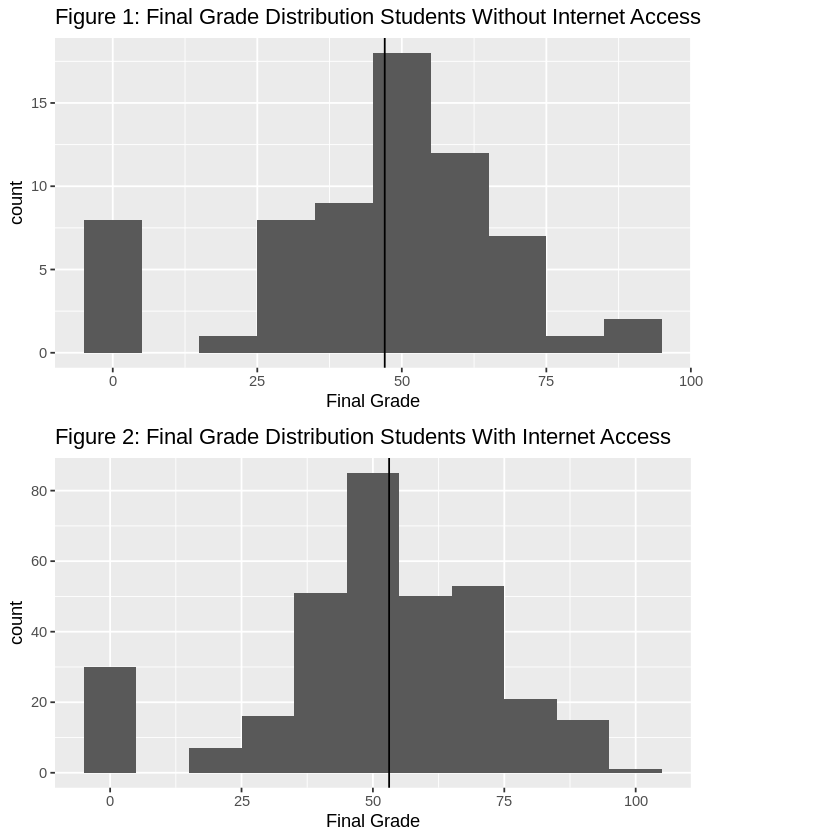

In [13]:
plot_grid(plot_no_internet, NULL, plot_have_internet, rel_widths = c(5,1,5))

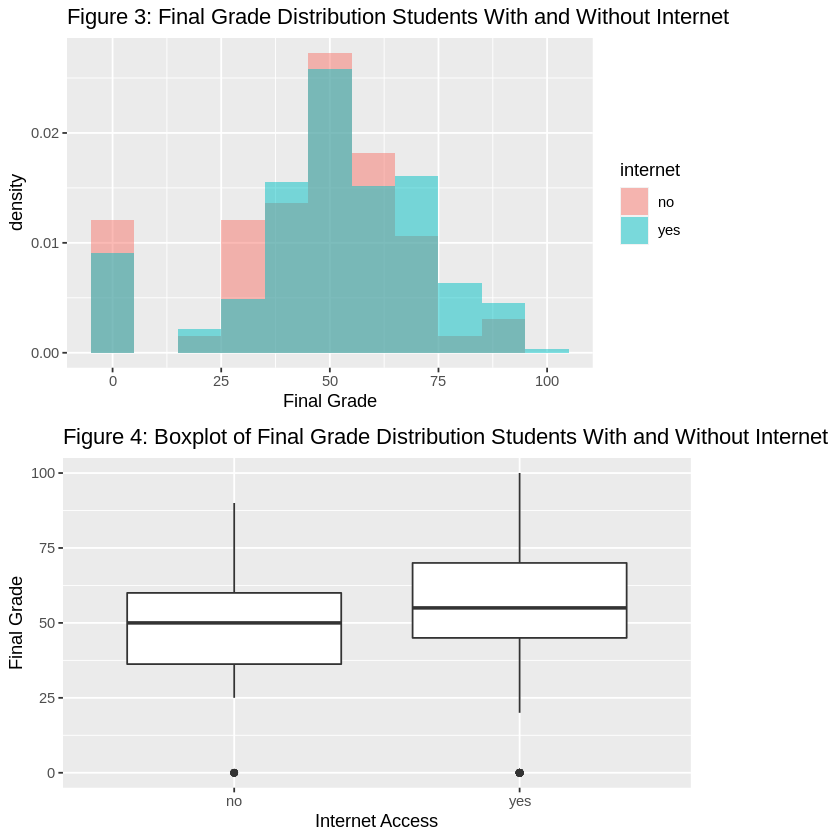

In [14]:
plot_grid(plot_both, NULL, boxplot, rel_widths = c(5,1,5), rel_heights = c(5,5))

## **Methods**
<p> In this analysis, we are drawing from a data set that is unbiased and representative. In the above section, we tidy and wrangle this data, then visualize it to get a sense of its meaning. By explaining our work and decision-making along the way, we produce a reproducible and trustworthy report. <br>
Our initial analysis of the data is limiting because we only have access to sample distributions, among other preliminary statistics. Based on figure 3, we can hypothesize that students with internet access perform better than those without. However, we do not have a sense of how reliable this evidence is. While we have access to the mean grades for each group, we don’t have a measure of confidence for those values. To extend our analysis, we can conduct a hypothesis test and construct a confidence interval for the means of both groups of students. 
    
#### **Hypothesis Test:**
$m_1:$ the mean grade of students *with* internet access <br>
$m_2:$ the mean grade of students *without* internet access
 
##### **Null hypothesis:**
$H_o: m_1 - m_2 = 0$
##### **Alternative hypothesis:**
$H_a: m_1 - m_2 > 0$
 
<p> We expect that we will be able to reject our null hypothesis and accept our alternative hypothesis. In other words, we can show that the mean grade of students without internet access is lower than the mean grade of students with internet access. <br>
At a large scale, these findings could inform education decision-makers as to the best ways to support their students and improve overall scores. Specifically, governments should invest in providing students with internet access outside of school hours and at home. <br>
Because this research looks at education as it happens in the home, especially how technology enables education to continue at home, we might ask more questions about these environments and how they impact students. For example, we might ask if students with their own personal device(s) perform better than students who share devices with others in their family. We might also ask if students with newer models of laptops or tablets (e.g. made within the last 5 years) perform better than students with older models. Finally, we might ask if students whose guardians have high technology and internet literacy perform better than students whose guardians do not. Like our research, these findings might inform government education spending and investments in technology for students.


## References

Jackson, L. A., von Eye, A., Biocca, F. A., Barbatsis, G., Zhao, Y., & Fitzgerald, H. E. (2006). Does home internet use influence the academic performance of low-income children? Developmental Psychology, 42(3), 429–435. https://doi.org/10.1037/0012-1649.42.3.429



Tarimo, R. & Kavishe, G. (2017). Internet access and usage by secondary school students in Morogoro Municipality, Tanzania. International Journal of Education and Development using ICT, 13(2), 56-69. 